<a href="https://colab.research.google.com/github/jpandersen61/Machine-Learning/blob/main/Linear_Regression_Lifeexpectancy_Continued2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Life expectancy - Continued2

---



The purpose of this assignment is to work with some of the elements from in the End-to-End Project AI/Machine Learning project model. We are interested in predicting Life expectancy with the final model.

We will work with et dataset from Kaggle: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

### Ensure that we use Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

### Ensure that we use at least Scikit-Learn 1.0.1

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Let us set up the fonts in mathplotlib

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

### Import important libraries 'numpy' and 'pandas'

In [ ]:
import numpy as np
import pandas as pd

# Make reference to life satifaction data file

In [ ]:
datafile = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/Life%20Expectancy%20Data%20(WHO).csv"



### Solved:

1.   Try viewing this file in your internet browser




### Load the data file

In [ ]:
lifeExp = pd.read_csv(datafile)


### Solved:

1.   Check the `type(...)` of `lifeExp` in a code cell. It is expected to be `DataFrame`. You may find out, what can be done with this class?
2.   Inspect the first 5 intances of the data with the `head()` method



In [ ]:
type(lifeExp)

pandas.core.frame.DataFrame

In [ ]:
lifeExp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Solved







1.   We are not satisfied the coloumn identifiers, which will cause problems with Python.
2.   So we rename the indentifiers in the code cell below -> Nothing to be done except from running the code cell below




In [ ]:
lifeExp.rename(columns={
    'Life expectancy ':'LifeExpectancy',
    'Adult Mortality':'AdultMortality',
    'Measles ':'Measles',
    'infant deaths':'InfantDeaths',
    'percentage expenditure':'PercentageExpenditure',
    ' BMI ':'BMI' ,
    'Hepatitis B':'HepatitisB',
    'under-five deaths ': 'Under5Deaths',
    'Total expenditure':'TotalExpenditure',
    ' HIV/AIDS':'HIVAIDS',
    ' thinness  1-19 years':'Thinness1To19Years',
    ' thinness 5-9 years':'Thinness5To9Years',
    'Income composition of resources':'IncomeCompositionOfResources',
    'Diphtheria ':'Diphtheria' },  inplace=True)

### Solved

1.   Now again inspect the first 5 intances of the data with the `head()` method
2.   Inspect the dataset with the `info()` method. Note data types. Are there some mal-formed column idnetifiers now?



In [ ]:
lifeExp.head()

,Country,Year,Status,LifeExpectancy,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIVAIDS,GDP,Population,Thinness1To19Years,Thinness5To9Years,IncomeCompositionOfResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   LifeExpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  Under5Deaths                  2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

### Solved

1. Make histogram plots om the dataset - e.g. with a code cell that contains som code like this
```
lifeExp.hist(bins=50, figsize=(18, 12))
plt.show()
```
2.   Are all the features nicely bell-shaped? If not leave it for now, because we may do something something about it later, if we are not satisfied with the performance of the model.






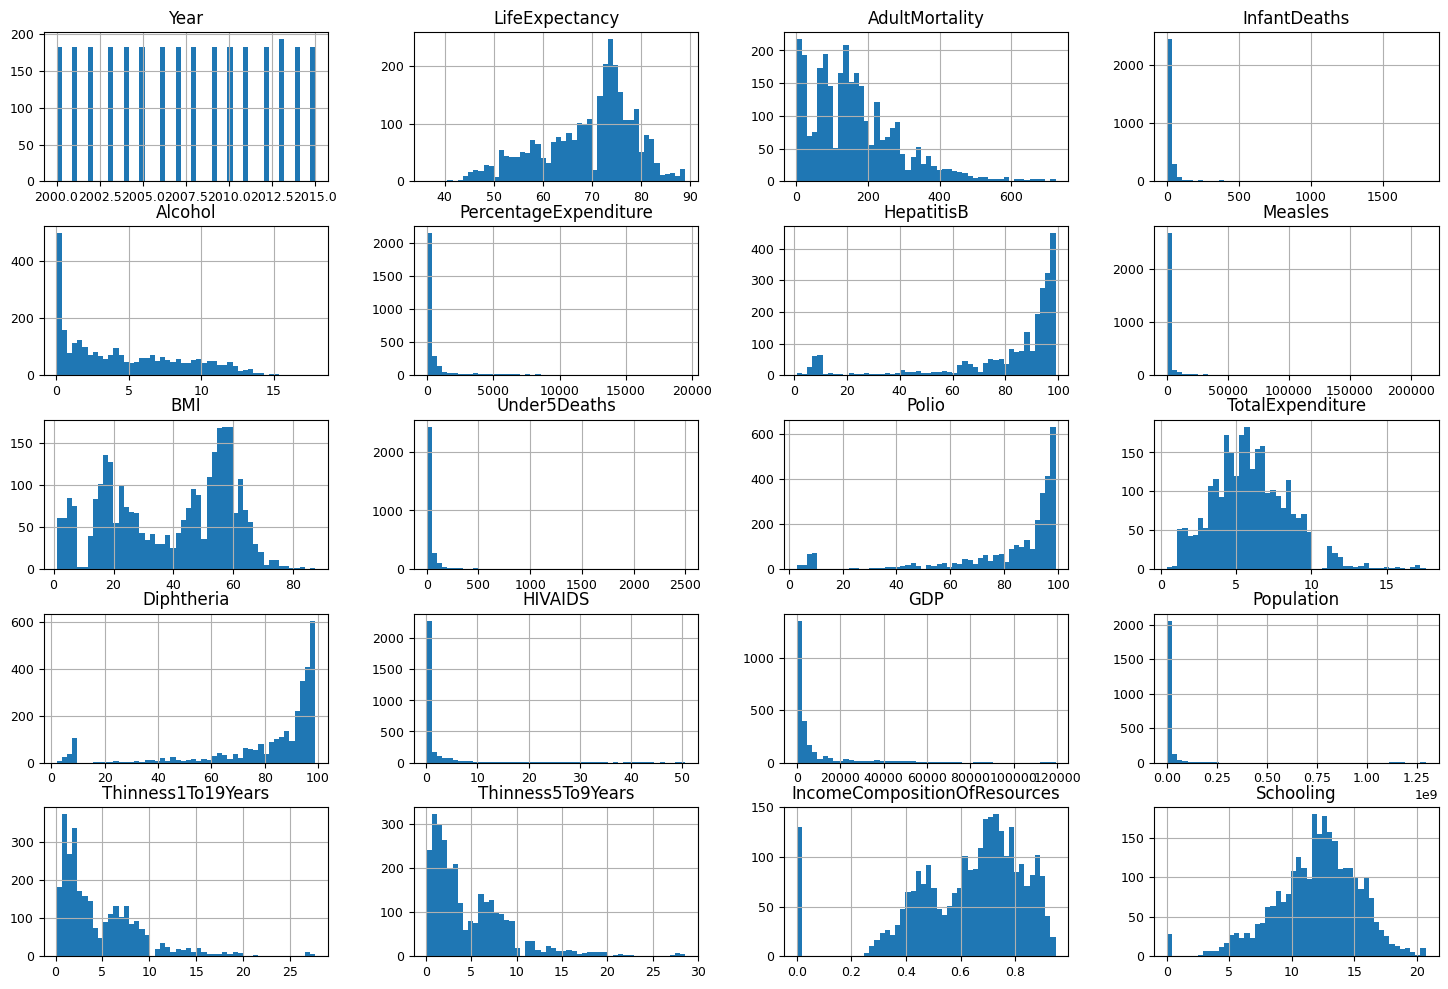

In [ ]:
lifeExp.hist(bins=50, figsize=(18, 12))
plt.show()

### Solved



1.   Establish the correlations between the features of the dataset. Use a piece of code like this:
```
corr_matrix = lifeExp.corr(numeric_only=True)
```


2.   Focus on "LifeExpectancy" with a piece of code like this
```
corr_matrix["LifeExpectancy"].sort_values(ascending=False)
```
Which the features, that best for predicting "LifeExpectancy" ?





In [ ]:
corr_matrix = lifeExp.corr(numeric_only=True)

In [ ]:
corr_matrix["LifeExpectancy"].sort_values(ascending=False)

,LifeExpectancy
LifeExpectancy,1.000000
Schooling,0.751975
IncomeCompositionOfResources,0.724776
BMI,0.567694
Diphtheria,0.479495
Polio,0.465556
GDP,0.461455
Alcohol,0.404877
PercentageExpenditure,0.381864
HepatitisB,0.256762


### Solved

1.   Plot the most promissing features against 'LifeExpectancy' with a piece of code like this:
```
from pandas.plotting import scatter_matrix
promissingFeatures = ['LifeExpectancy', <promissing features>]
scatter_matrix(lifeExp[promissingFeatures], figsize=(18, 12))
plt.show()
```

See anything?

2.   Do something similar with the least promising features.


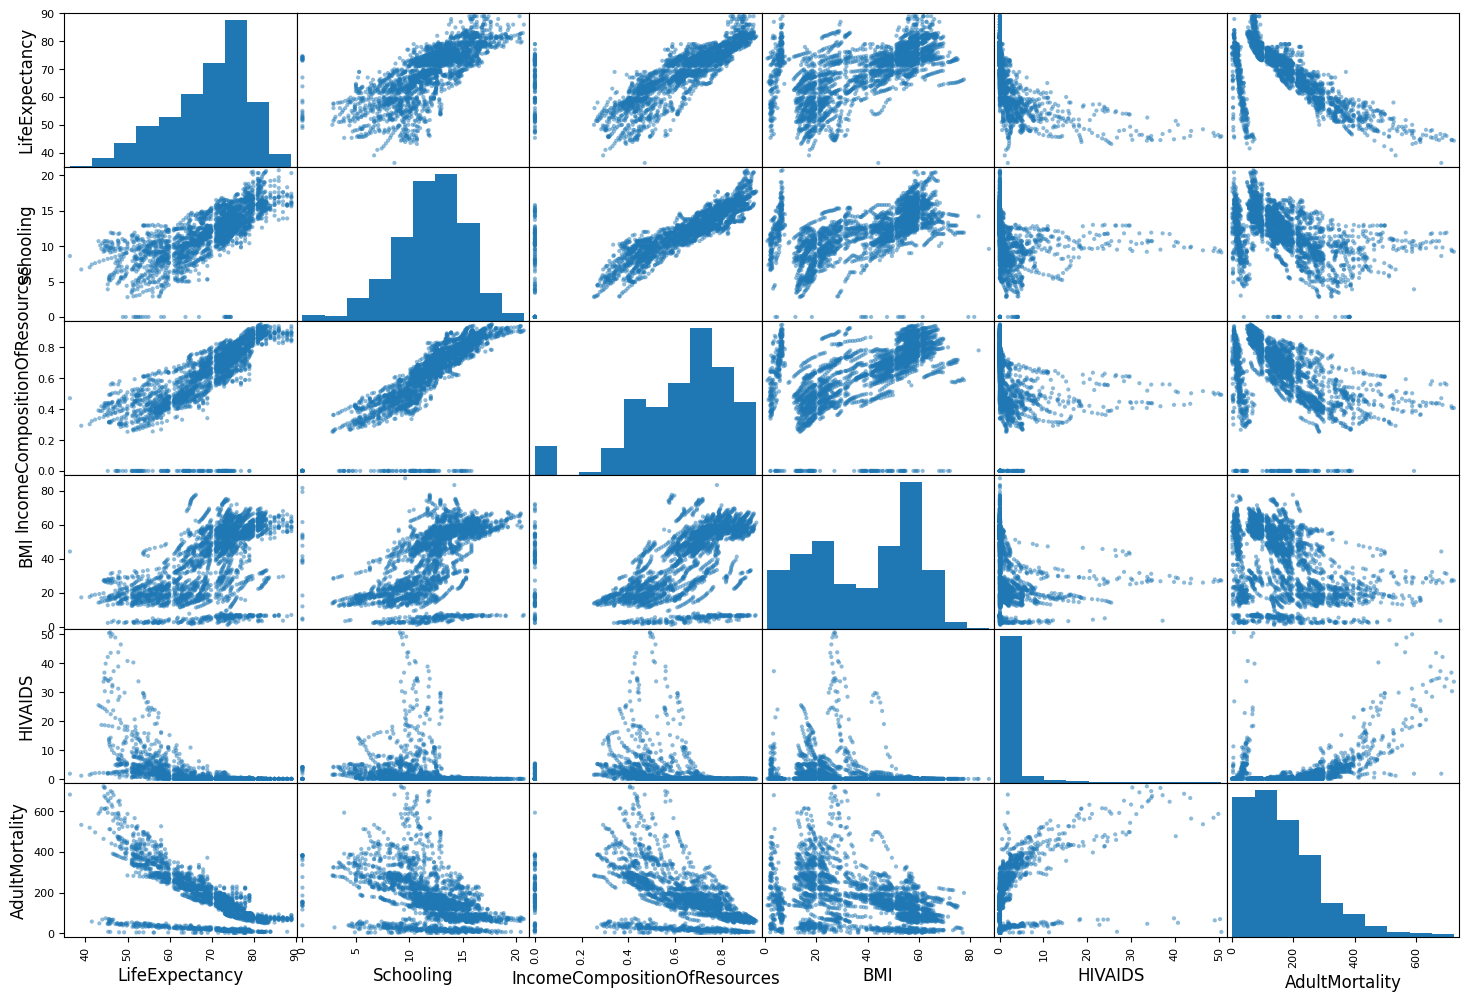

In [ ]:
from pandas.plotting import scatter_matrix

promissingFeatures = ['LifeExpectancy', 'Schooling', 'IncomeCompositionOfResources', 'BMI', 'HIVAIDS', 'AdultMortality']
scatter_matrix(lifeExp[promissingFeatures], figsize=(18, 12))
plt.show()

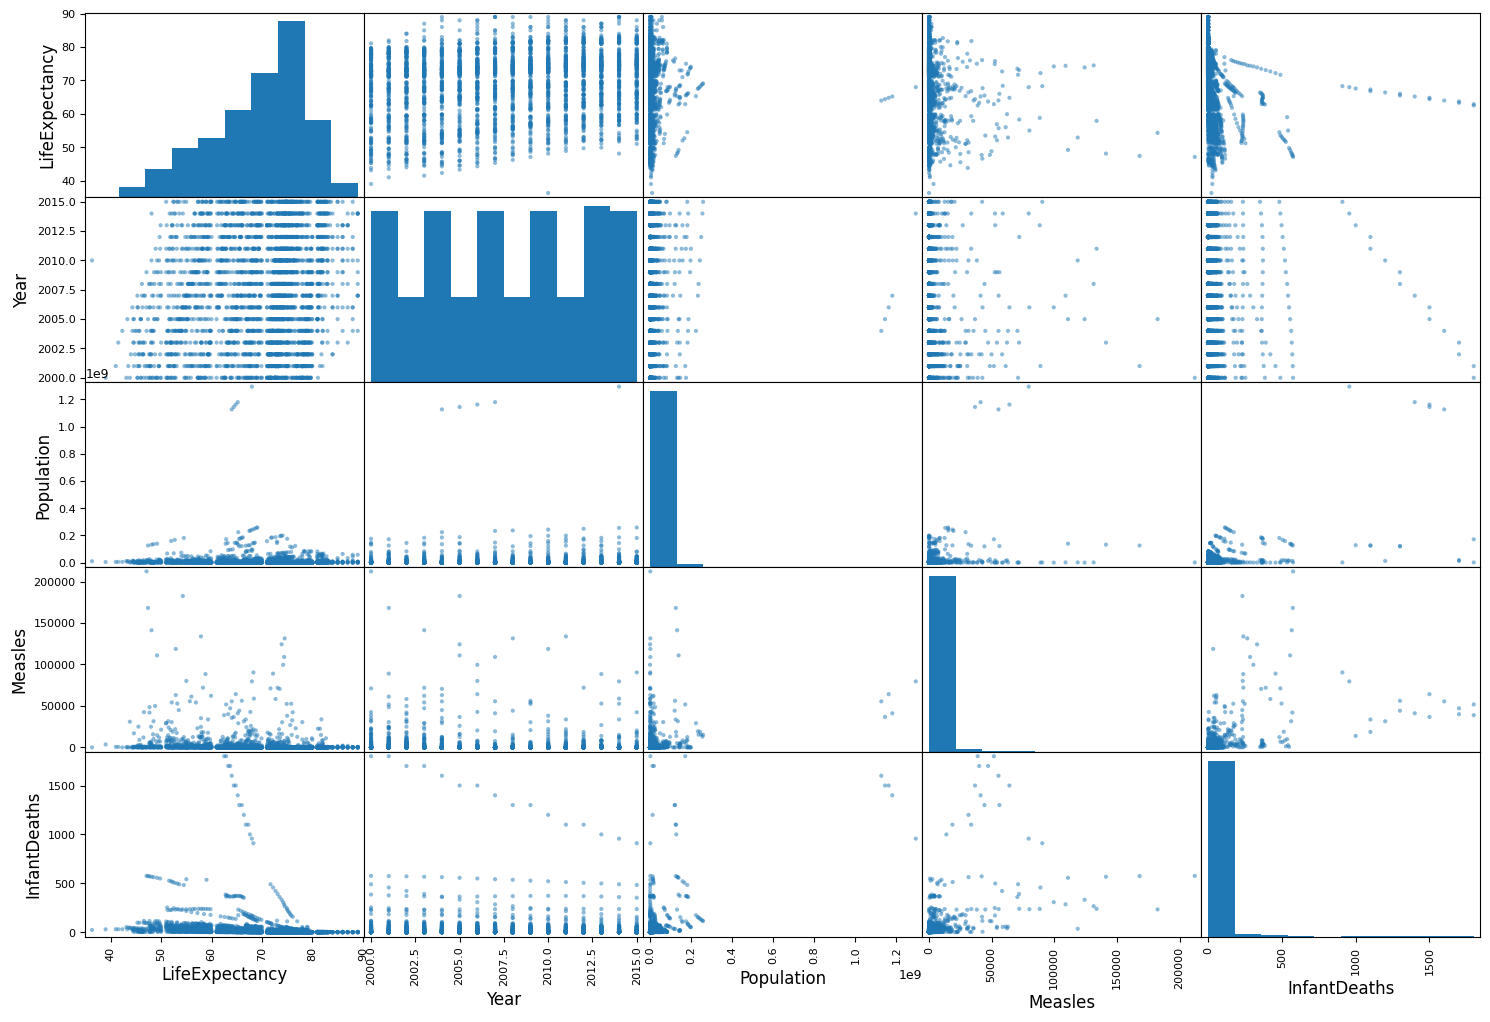

In [ ]:
notSoPromissingFeatures = ['LifeExpectancy', 'Year', 'Population', 'Measles', 'InfantDeaths']
scatter_matrix(lifeExp[notSoPromissingFeatures], figsize=(18, 12))
plt.show()

### Solved

1.   Define a list of not so promissing features to be dropped -> Run the cell below
2.   The extract the list of promissing features, that model are going to learn from, with a code fragment like this:
```
lifeExpLearn=lifeExp.drop(<Features to be dropped>, axis=1)
```
3.   Now check our learning set with `info()` method









In [ ]:
featuresToBeDropped={'Country',
                     'Status',
                     'Diphtheria',
                     'Polio',
                     'GDP',
                     'Alcohol',
                     'PercentageExpenditure',
                     'HepatitisB',
                     'TotalExpenditure',
                     'Year',
                     'Population',
                     'Measles',
                     'InfantDeaths',
                     'Under5Deaths',
                     'Thinness5To9Years',
                     'Thinness1To19Years'}

In [ ]:
lifeExpLearn=lifeExp.drop(featuresToBeDropped, axis=1)

In [ ]:
lifeExpLearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LifeExpectancy                2928 non-null   float64
 1   AdultMortality                2928 non-null   float64
 2   BMI                           2904 non-null   float64
 3   HIVAIDS                       2938 non-null   float64
 4   IncomeCompositionOfResources  2771 non-null   float64
 5   Schooling                     2775 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


### Solved

It should appearent that some values are still missing. We are now going to fix this with the `SimpleImputer` class:

1.   Import the `SimpleImputer` class with a statement like this, because we believe that the median value is the best replacement:
```
imputer = SimpleImputer(strategy="median")
```

2.   'Fit' the with our learning set - e.g.:
```
imputer.fit(lifeExpLearn)
```

3.   Make the actual replacement with a piece of code like this:
```
transformation=imputer.transform(lifeExpLearn)
```

4.   Note the `type()` of `transformation`

5.   Re-combine our `transformation` into a `Dataframe` - like this:
```
lifeExpLearnCleaned = pd.DataFrame(transformation, columns=lifeExpLearn.columns,index=lifeExpLearn.index)
```

6.   Now check missing values - e.g.
```
lifeExpLearnCleaned.info()
```
Any thing missing now?









In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
imputer.fit(lifeExpLearn)

SimpleImputer(strategy='median')

In [ ]:
transformation=imputer.transform(lifeExpLearn)

In [ ]:
type(transformation)

numpy.ndarray

In [ ]:
lifeExpLearnCleaned = pd.DataFrame(transformation, columns=lifeExpLearn.columns,
                                  index=lifeExpLearn.index)

In [ ]:
lifeExpLearnCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LifeExpectancy                2938 non-null   float64
 1   AdultMortality                2938 non-null   float64
 2   BMI                           2938 non-null   float64
 3   HIVAIDS                       2938 non-null   float64
 4   IncomeCompositionOfResources  2938 non-null   float64
 5   Schooling                     2938 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


### Solved

1.   Go on with the `LinearRegression` as you did in a previous assignment. You may extract input for it like this:
```
X_features = lifeExpLearnCleaned.drop("LifeExpectancy", axis=1)
y_labels = lifeExpLearnCleaned["LifeExpectancy"].values
```






In [ ]:
X_features = lifeExpLearnCleaned.drop("LifeExpectancy", axis=1)
y_labels = lifeExpLearnCleaned["LifeExpectancy"].values



In [ ]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()
lin1.fit(X_features, y_labels)



LinearRegression()

In [ ]:
lin1.intercept_

np.float64(54.88461447029767)

In [ ]:
lin1.coef_

array([-0.02254855,  0.06698218, -0.47695088,  8.24202581,  0.92665816])

In [ ]:
t0 = lin1.intercept_
t1 = lin1.coef_[0]
t2 = lin1.coef_[1]
t3 = lin1.coef_[2]
t4 = lin1.coef_[3]
t5 = lin1.coef_[4]

In [ ]:
print(f"θ0={t0:.2f}, θ1={t1:.2e}, θ2={t2:.2e}, θ3={t3:.2e}, θ4={t4:.2e}, θ5={t5:.2e}")

θ0=54.88, θ1=-2.25e-02, θ2=6.70e-02, θ3=-4.77e-01, θ4=8.24e+00, θ5=9.27e-01


In [ ]:
X_pred = [X_features.AdultMortality[0], X_features.BMI[0], X_features.HIVAIDS[0], X_features.IncomeCompositionOfResources[0] , X_features.Schooling[0]]
type(X_pred)

list

In [ ]:
y_pred = lin1.predict([X_pred])
y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.49318703])

# Scaling

This section is about scaling the feature set. First we import the `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler

### Solved

Steps:
1. Create an `StandardScaler` instance and assign it to a variable.
2. Apply the scaler's `fit_transform` method with the cleaned feature set `lifeExpLearnCleaned` as argument.
3. Compare the scaled and un-scaled feature sets with the `DataFrame` method `describe()`

Hint: You may use `DataFrame(<result from fit_transform>, columns=lifeExpLearnCleaned.columns)` to create a `DataFrame` for the scaled feature set.

In [ ]:
lifeExpLearnCleaned.describe()

,LifeExpectancy,AdultMortality,BMI,HIVAIDS,IncomeCompositionOfResources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.234717,164.725664,38.381178,1.742103,0.630362,12.009837
std,9.509115,124.086215,19.935375,5.077785,0.205140,3.265139
min,36.300000,1.000000,1.000000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,19.400000,0.100000,0.504250,10.300000
50%,72.100000,144.000000,43.500000,0.100000,0.677000,12.300000
75%,75.600000,227.000000,56.100000,0.800000,0.772000,14.100000
max,89.000000,723.000000,87.300000,50.600000,0.948000,20.700000


In [ ]:
scaler = StandardScaler()
lifeExpLearnCleanedScaled = scaler.fit_transform(lifeExpLearnCleaned)
lifeExpLearnCleanedScaled = pd.DataFrame(lifeExpLearnCleanedScaled, columns=lifeExpLearnCleaned.columns)
lifeExpLearnCleanedScaled

,LifeExpectancy,AdultMortality,BMI,HIVAIDS,IncomeCompositionOfResources,Schooling
0,-0.445408,0.792119,-0.967349,-0.323445,-0.737973,-0.585017
1,-0.981827,0.856601,-0.992434,-0.323445,-0.752600,-0.615649
2,-0.981827,0.832421,-1.017519,-0.323445,-0.781853,-0.646281
3,-1.023899,0.864662,-1.042605,-0.323445,-0.815982,-0.676912
4,-1.055453,0.888843,-1.062673,-0.323445,-0.859862,-0.768808
...,...,...,...,...,...,...
2933,-2.622638,4.499850,-0.565984,6.275044,-1.089014,-0.860703
2934,-2.601602,4.435368,-0.586052,6.885650,-1.035383,-0.768808
2935,-2.570047,-0.739335,-0.606120,7.496256,-0.991502,-0.615649
2936,-2.517457,4.201620,-0.626188,7.949287,-0.991502,-0.676912


In [ ]:
lifeExpLearnCleanedScaled.describe()

,LifeExpectancy,AdultMortality,BMI,HIVAIDS,IncomeCompositionOfResources,Schooling
count,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03
mean,3.651870e-16,5.320606e-17,-6.650757e-17,-1.934766e-17,1.596182e-16,4.304854e-16
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-3.464079e+00,-1.319675e+00,-1.875437e+00,-3.234448e-01,-3.073366e+00,-3.678827e+00
25%,-6.347325e-01,-7.312747e-01,-9.522976e-01,-3.234448e-01,-6.148656e-01,-5.237534e-01
50%,3.013709e-01,-1.670548e-01,2.568145e-01,-3.234448e-01,2.273872e-01,8.888221e-02
75%,6.695014e-01,5.019489e-01,8.889644e-01,-1.855659e-01,6.905653e-01,6.402543e-01
max,2.078916e+00,4.499850e+00,2.454288e+00,9.623530e+00,1.548664e+00,2.661952e+00


# Pipelining

This section is about pipe lining the fitting process. First we import the necassary components.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression



### Solved

Steps:
1. With the `make_pipeline` method include a `StandardScaler` as the first step and a `LinearRegression` as the second and final step.
2. Reference the pipeline instance with a variable.
3. Now perform fitting and and prediction as you when were using `LinearRegression` stand alone.  

In [ ]:
RegressionPipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [ ]:
X_features = lifeExpLearnCleaned.drop("LifeExpectancy", axis=1)
y_labels = lifeExpLearnCleaned["LifeExpectancy"].values

In [ ]:
RegressionPipeline.fit(X_features, y_labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = RegressionPipeline.predict([X_pred])
y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.49318703])

In [ ]:
y_pred = RegressionPipeline.predict(X_features[:1])
y_pred

array([63.49318703])

# Checking performance

This section is about checking performance on a linear regression with root-mean-squared-error RMSE

In [ ]:
from sklearn.metrics import root_mean_squared_error

### Exercise(s)

Steps:
1. Calculate the `root_mean_squared_error` using this method on labels and predicted values.
2. What does the result tell ?


# Fine tuning

This section is about fine tuning your model with grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

### Exercise(s)

Steps:
1. Apply the `GridSearchCV` algorithm on your pipeline.
2. You must first find out what the what the tuning parameters `LinearRegression` are.
3. What set of tuning parameters are the best regarding performance ?